# 대푯값 (Mean / Median / Mode)
다음 데이터는 10명의 학생이 하루에 사용하는 스마트폰 시간(시간 단위)입니다. <br>
`data = [2, 3, 3, 4, 4, 5, 7, 7, 7, 8]` <br>

문제 1. 평균(mean)을 계산하세요. <br>
문제 2. 중앙값(median)을 계산하세요. <br>
문제 3. 최빈값(mode)을 계산하세요. <br>
문제 4. 평균, 중앙값, 최빈값의 차이를 해석하세요.

In [1]:
import statistics

In [2]:
data = [2, 3, 3, 4, 4, 5, 7, 7, 7, 8]

In [3]:
# 문제 1. 평균(mean)을 계산하세요.
statistics.mean(data)

5

In [4]:
# 문제 2. 중앙값(median)을 계산하세요.
statistics.median(data)

4.5

In [5]:
# 문제 3. 최빈값(mode)을 계산하세요
statistics.mode(data)

7

문제 4. 평균, 중앙값, 최빈값의 차이를 해석하세요.
- 평균은 모든 데이터를 합혀서 전체수로 나누고 중앙값은 전체데이터에 가운데 값을 의미하며 최빈값은 가장 자주 나온 데이터를 의미한다.

## 2️⃣ 기하평균 (Geometric Mean)
문제 5. 다음 4년간의 매출 성장률이 있습니다. `[1.10, 1.05, 0.95, 1.15]`<br>
평균 성장률을 (1) 산술평균과 (2) 기하평균으로 각각 계산하세요.<br>
기하평균은 `scipy.stats.gmean()` 함수를 사용하세요.

In [6]:
from scipy.stats import gmean

In [7]:
# 문제 5. 다음 4년간의 매출 성장률이 있습니다. [1.10, 1.05, 0.95, 1.15]
gr = [1.10, 1.05, 0.95, 1.15]

In [8]:
# 산술평균
statistics.mean(gr)

1.0625

In [9]:
# 기하쳥균
gmean(gr)

np.float64(1.0598657487606669)

## 3️⃣ 도수분포표와 히스토그램
아래 코드를 실행하여 Titanic 데이터를 불러오세요.
```python
import pandas as pd
df = pd.read_csv("./data/titanic.csv")
```

문제 6. `Age` 컬럼의 결측치를 제거하고 기초 통계를 확인하세요. <br>
문제 7. `Age`를 10개의 구간(bin)으로 나누어 도수분포표를 작성하세요.<br>
문제 8. 위 도수분포를 `bar` 형태로 시각화하세요.<br>
문제 9. 전체 인원 중 20대(20~29세)의 비율을 계산하세요.

In [10]:
import pandas as pd
df = pd.read_csv("./data/Titanic_train.csv")

In [11]:
df['Age'].isna().sum()

np.int64(177)

In [12]:
df = df.dropna(subset=['Age'])

In [13]:
# 문제6
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
# 문제7 `Age`를 10개의 구간(bin)으로 나누어 도수분포표를 작성하세요.
bin = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
age_FDT =  pd.cut(df['Age'].values,bins=bin,labels=labels,right=False)
print(age_FDT.value_counts())

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64


<Axes: >

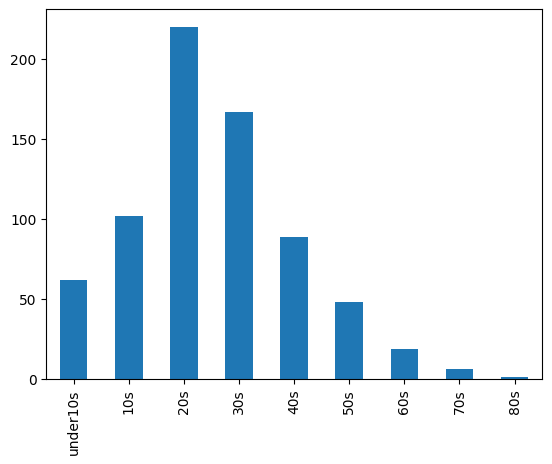

In [15]:
# 문제 8. 위 도수분포를 bar 형태로 시각화하세요.
age_FDT.value_counts().plot(kind='bar')

In [16]:
# 문제 9. 전체 인원 중 20대(20~29세)의 비율을 계산하세요.
fdt_df = pd.DataFrame(age_FDT.value_counts())
fdt_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [17]:
fdt_df['count']/fdt_df['count'].sum()
# 30프로 입니다

under10s    0.086835
10s         0.142857
20s         0.308123
30s         0.233894
40s         0.124650
50s         0.067227
60s         0.026611
70s         0.008403
80s         0.001401
Name: count, dtype: float64

## 4️⃣ 분산과 표준편차
문제 10. data = [2,3,3,4,4,5,7,7,7,8] 에서 편차(x-평균)을 구하세요. <br>
문제 11. 각 편차를 제곱하여 편차제곱을 구하세요. <br>
문제 12. 분산과 표준편차를 직접 계산하고, `numpy.var()`, `numpy.std()` 결과와 비교하세요.

In [18]:
#문제 10. data = [2,3,3,4,4,5,7,7,7,8] 에서 편차(x-평균)을 구하세요
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns=['표본'])

In [19]:
a['평균'] = a['표본'].mean()
a['평균']

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: 평균, dtype: float64

In [20]:
a['편차'] = a['표본'] - a['평균']
a

,표본,평균,편차
0,2,5.0,-3.0
1,3,5.0,-2.0
2,3,5.0,-2.0
3,4,5.0,-1.0
4,4,5.0,-1.0
5,5,5.0,0.0
6,7,5.0,2.0
7,7,5.0,2.0
8,7,5.0,2.0
9,8,5.0,3.0


In [21]:
# 문제 11. 각 편차를 제곱하여 편차제곱을 구하세요
a['편차제곱'] = a['편차'] ** 2
a

,표본,평균,편차,편차제곱
0,2,5.0,-3.0,9.0
1,3,5.0,-2.0,4.0
2,3,5.0,-2.0,4.0
3,4,5.0,-1.0,1.0
4,4,5.0,-1.0,1.0
5,5,5.0,0.0,0.0
6,7,5.0,2.0,4.0
7,7,5.0,2.0,4.0
8,7,5.0,2.0,4.0
9,8,5.0,3.0,9.0


In [22]:
# 문제 12. 분산과 표준편차를 직접 계산하고, numpy.var(), numpy.std() 결과와 비교하세요.

In [23]:
import numpy as np

In [24]:
np.var(a['표본'])

np.float64(4.0)

In [25]:
np.std(a['표본'])

np.float64(2.0)

## 5️⃣ 표준점수 (Z-score)
문제 13. 다음 시험 점수가 있습니다: `[55, 60, 65, 70, 75, 80, 85, 90, 95, 100]` <br>
문제 14. 평균과 표준편차를 계산하고, 각 점수의 Z-score를 구하세요. <br>
문제 15. Z-score가 1.0 이상인 학생의 비율은 얼마인가요? (Z>1의 의미를 주석으로 설명하세요.)

In [26]:
import statsmodels.stats.weightstats as stests
from scipy import stats as ss

In [31]:
score = np.array([55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

In [34]:
# 문제 14. 평균과 표준편차
mean = score.mean()
std = score.std()

In [35]:
print(mean,std)

77.5 14.361406616345072


In [37]:
z_scores = (score - mean) / std

In [51]:
np.sum(z_scores >= 1.0) / len(score)
# 20프로이다.

np.float64(0.2)